# Parameter Graph Search Query Examples

This tutorial goes over the `NsearchgoeQuery.py` and `MGsearchthroughPG.py` queries using a simple testing network. The query `NsearchgoeQuery.py` can be used to find edges in the parameter graph where the starting and ending nodes have the desired fixed points. The `MGsearchthroughPG.py` query then uses these edges to find paths through the parameter graph where each node in the path has the desired fixed point(s).

In [1]:
import DSGRN
from DSGRN import *

import sys
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/src')

from PGDraw import *
from MGsearchthroughPG import *
from NsearchgoeQuery import *

In [2]:
database = Database("/home/elizabeth/Desktop/ACDC/TFP_test.db") 
network = Network("/home/elizabeth/Desktop/ACDC/TFP_test") 

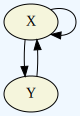

In [3]:
DrawGraph(network)

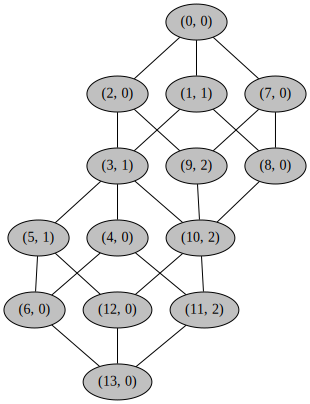

In [4]:
PGGraph(database, network)

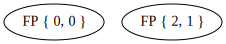

In [5]:
database.DrawMorseGraph(0)

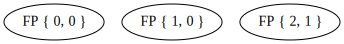

In [6]:
database.DrawMorseGraph(1)

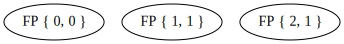

In [7]:
database.DrawMorseGraph(2)

Notice that there are three different morse graph indexes in this example. The `NFixedPointQuery.py` query can find any morse graph indexes with any N number of fixed points, as long as they contain our fixed point(s) of interest. Say I am intereseted in finding any morse graph indexes that have fixed points {0,0} and {2,1}, then I can use this query by first setting up the 'bounds' to be searched. Then I can put them directly into the query, we already know from drawing all of the morse graphs above that this search should return {0,1,2}. Note: this will throw an error is the bounds are overlapping. 

In [8]:
bounds00 = {"X":0, "Y":0} #FP {0,0}
bounds21 = {"X":2, "Y":1} #FP {2,1}

In [9]:
NFP = NFixedPointQuery(database, bounds00, bounds21).matches()

2020-08-06 10:16:57.988442:
MatchQuery({'X': 0, 'Y': 0}, Matches0)
2020-08-06 10:16:57.988947:
MatchQuery :: built expressions ["Label like 'FP { 0, _%'", "Label like 'FP { _, 0%'"]
2020-08-06 10:16:57.989186:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _%';
2020-08-06 10:16:57.989716:
MatchQuery :: create temp table Matches0 as select * from tmpMatches1 where Label like 'FP { _, 0%';
2020-08-06 10:16:57.990086:
MatchQuery :: constructed
2020-08-06 10:16:57.990448:
MatchQuery({'X': 2, 'Y': 1}, Matches1)
2020-08-06 10:16:57.990657:
MatchQuery :: built expressions ["Label like 'FP { 2, _%'", "Label like 'FP { _, 1%'"]
2020-08-06 10:16:57.990860:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _%';
2020-08-06 10:16:57.991328:
MatchQuery :: create temp table Matches1 as select * from tmpMatches1 where Label like 'FP { _, 1%';
2020-08-06 10:16:57.991671:
MatchQuery :

In [10]:
NFP

{0, 1, 2}

The `NsearchqoeQuery.py` has some additional setup. If we want to search for any edges that take us from morse graph indexes containing ONLY fixed points {0,0} and {2,1} to morse graph indexes containing ONLY {0,0}, {1,0} and {2,1}, then we need to make seperate lists containing these fixed points.

In [11]:
bounds10 = {"X":1, "Y":0} #FP {1,0}

MGI0 = [bounds00, bounds21] #We do already know this is MGI 0
MGI1 = [bounds00, bounds21, bounds10] #and this is MGI 1

Since we want only this fixed points in the morse graphs, then we use '=' as the second and third input into the query. 

In [12]:
NsearchgoeQuery(database, '=', '=', MGI0, MGI1).stability_of_matches()

2020-08-06 10:16:58.007181:
MatchQuery({'X': 0, 'Y': 0}, Matches0)
2020-08-06 10:16:58.007600:
MatchQuery :: built expressions ["Label like 'FP { 0, _%'", "Label like 'FP { _, 0%'"]
2020-08-06 10:16:58.007839:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _%';
2020-08-06 10:16:58.008280:
MatchQuery :: create temp table Matches0 as select * from tmpMatches1 where Label like 'FP { _, 0%';
2020-08-06 10:16:58.008645:
MatchQuery :: constructed
2020-08-06 10:16:58.009050:
MatchQuery({'X': 2, 'Y': 1}, Matches1)
2020-08-06 10:16:58.009293:
MatchQuery :: built expressions ["Label like 'FP { 2, _%'", "Label like 'FP { _, 1%'"]
2020-08-06 10:16:58.009566:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _%';
2020-08-06 10:16:58.010032:
MatchQuery :: create temp table Matches1 as select * from tmpMatches1 where Label like 'FP { _, 1%';
2020-08-06 10:16:58.010443:
MatchQuery :

{(0, 1, 1), (2, 3, 1), (4, 3, 1), (6, 5, 1), (8, 1, 1), (12, 5, 1)}

The output is a set of tuples. Each of these tuples is a different edge in the parameter graph. Looking at the second item in the output from the above search, (2, 3, 1), 2 is the parameter graph index of the starting node, 3 is the ending node and 1 is the morse graph index of the ending node. If we want to do a search where other fixed points can also be in the morse graphs other than the ones we specify, then we can use '<' in place of '='. In the next search I am looking for any edges that take us from any morse graph indexes containing fixed points {0,0} and {2,1} to morse graph indexes containing ONLY {0,0}, {1,0} and {2,1}

In [13]:
NsearchgoeQuery(database, '<', '=', MGI0, MGI1).stability_of_matches()

2020-08-06 10:16:58.025716:
MatchQuery({'X': 0, 'Y': 0}, Matches0)
2020-08-06 10:16:58.026150:
MatchQuery :: built expressions ["Label like 'FP { 0, _%'", "Label like 'FP { _, 0%'"]
2020-08-06 10:16:58.026430:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _%';
2020-08-06 10:16:58.027117:
MatchQuery :: create temp table Matches0 as select * from tmpMatches1 where Label like 'FP { _, 0%';
2020-08-06 10:16:58.027570:
MatchQuery :: constructed
2020-08-06 10:16:58.028003:
MatchQuery({'X': 2, 'Y': 1}, Matches1)
2020-08-06 10:16:58.028289:
MatchQuery :: built expressions ["Label like 'FP { 2, _%'", "Label like 'FP { _, 1%'"]
2020-08-06 10:16:58.028537:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _%';
2020-08-06 10:16:58.028891:
MatchQuery :: create temp table Matches1 as select * from tmpMatches1 where Label like 'FP { _, 1%';
2020-08-06 10:16:58.029414:
MatchQuery :

{(0, 1, 1),
 (1, 3, 1),
 (2, 3, 1),
 (3, 1, 1),
 (3, 5, 1),
 (4, 3, 1),
 (5, 3, 1),
 (6, 5, 1),
 (8, 1, 1),
 (10, 3, 1),
 (12, 5, 1)}

The `MGsearchthroughPG.py` query is similar to the `NsearchgoeQuery.py` query, except we can now enter in any number of fixed point sets and it will give use a path through them rather than just a single edge. In this next example, I am looking for paths through the parameter graph where we start on nodes containing ONLY fixed points {0,0} and {2,1}. This query allows for this set of fixed points to be repeated as many times as needed before moving onto the next set of fixed points as long as the parameter graph nodes are not repeated. The next set of fixed points I am interested in is ONLY {0,0}, {1,0} and {2,1}, then I want to end on a parameter graph node with ONLY fixed points {0,0}, {1,1} and {2,1}. Once a node with the last set of fixed points is found, the path is ended (so the last set of fixed points should never be repeated).

In [14]:
bounds11 = {"X":1, "Y":1} #FP {1,1}
MGI2 = [bounds00, bounds21, bounds11] #This is MGI 2

Path_of_interest = [MGI0, MGI1, MGI2]
M = MGsearchthroughPG(database,'=', '=', Path_of_interest).allpaths()

2020-08-06 10:16:58.046567:
MatchQuery({'X': 0, 'Y': 0}, Matches0)
2020-08-06 10:16:58.047115:
MatchQuery :: built expressions ["Label like 'FP { 0, _%'", "Label like 'FP { _, 0%'"]
2020-08-06 10:16:58.047558:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _%';
2020-08-06 10:16:58.048572:
MatchQuery :: create temp table Matches0 as select * from tmpMatches1 where Label like 'FP { _, 0%';
2020-08-06 10:16:58.049197:
MatchQuery :: constructed
2020-08-06 10:16:58.049865:
MatchQuery({'X': 2, 'Y': 1}, Matches1)
2020-08-06 10:16:58.050249:
MatchQuery :: built expressions ["Label like 'FP { 2, _%'", "Label like 'FP { _, 1%'"]
2020-08-06 10:16:58.050643:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _%';
2020-08-06 10:16:58.051596:
MatchQuery :: create temp table Matches1 as select * from tmpMatches1 where Label like 'FP { _, 1%';
2020-08-06 10:16:58.052228:
MatchQuery :

2020-08-06 10:16:58.095472:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _%';
2020-08-06 10:16:58.095935:
MatchQuery :: create temp table Matches1 as select * from tmpMatches1 where Label like 'FP { _, 1%';
2020-08-06 10:16:58.096313:
MatchQuery :: constructed
2020-08-06 10:16:58.096788:
MatchQuery({'X': 1, 'Y': 0}, Matches2)
2020-08-06 10:16:58.097044:
MatchQuery :: built expressions ["Label like 'FP { 1, _%'", "Label like 'FP { _, 0%'"]
2020-08-06 10:16:58.097268:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 1, _%';
2020-08-06 10:16:58.097728:
MatchQuery :: create temp table Matches2 as select * from tmpMatches1 where Label like 'FP { _, 0%';
2020-08-06 10:16:58.098067:
MatchQuery :: constructed
2020-08-06 10:16:58.098983:
MatchQuery({'X': 0, 'Y': 0}, Matches0)
2020-08-06 10:16:58.099283:
MatchQuery :: built expressions ["Label like 'FP { 0, _%'", "Label like '

In [15]:
M

[[4, 6, 5, 3, 10],
 [13, 6, 5, 3, 10],
 [13, 12, 5, 3, 10],
 [4, 6, 13, 12, 5, 3, 10],
 [12, 5, 3, 10],
 [6, 5, 3, 10],
 [2, 0, 1, 3, 10],
 [7, 8, 1, 3, 10],
 [7, 0, 1, 3, 10],
 [2, 0, 7, 8, 1, 3, 10],
 [0, 1, 3, 10],
 [8, 1, 3, 10],
 [6, 4, 3, 10],
 [0, 2, 3, 10],
 [4, 3, 10],
 [2, 3, 10]]

The output is a list of lists, where the sublists are our paths and the items in the sublist are the parameter graph indexes we have pased through. For example, the sublist [2, 3, 10] is a path throught the parameter graph that starts on parameter graph node 2, then moves onto 3 and ends on 10. 